# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations size=1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_dict = []


for indx, city in enumerate(cities):
    url = f'http://api.openweathermap.org/data/2.5/weather'
    params ={
        'units':'imperial',
        'q':city,
        'appid':weather_api_key
    }
    data = requests.get(url, params=params).json()
    time.sleep(1)
    try:
        cty = city.title()
        lt= data['coord']['lat']
        lg= data['coord']['lon']
        mxt= data['main']['temp_max']
        hmd=data['main']['humidity']
        cld=data['clouds']['all']
        wspd=data['wind']['speed']
        ctry=data['sys']['country']
        dt=data['dt']
        
        values = [cty,lt,lg,mxt,hmd,cld,wspd,ctry,dt]
        
        weather_dict.append(values)
        
        print(f'Processing Record {indx+1} of Set 1 | {city}')

    except KeyError:
        print("City not found. Skipping")

Processing Record 1 of Set 1 | busselton
City not found. Skipping
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | economy
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | shimoda
Processing Record 12 of Set 1 | tessalit
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | borogontsy
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | los llanos de aridane
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | springbok
Processing Record 22 of Set 1 | vilyuysk
Processing Record 23 of Set 1 | leningradskiy
Processing Record 24 of Set 1 | khata

Processing Record 204 of Set 1 | nadym
Processing Record 205 of Set 1 | ormara
Processing Record 206 of Set 1 | kavieng
City not found. Skipping
Processing Record 208 of Set 1 | villeta
Processing Record 209 of Set 1 | melnikovo
Processing Record 210 of Set 1 | pevek
City not found. Skipping
City not found. Skipping
Processing Record 213 of Set 1 | clyde river
Processing Record 214 of Set 1 | kamenka
Processing Record 215 of Set 1 | masallatah
Processing Record 216 of Set 1 | qurayyat
Processing Record 217 of Set 1 | barrow
City not found. Skipping
City not found. Skipping
Processing Record 220 of Set 1 | novomyrhorod
Processing Record 221 of Set 1 | awbari
Processing Record 222 of Set 1 | viedma
Processing Record 223 of Set 1 | changli
Processing Record 224 of Set 1 | klaksvik
Processing Record 225 of Set 1 | north bend
Processing Record 226 of Set 1 | tremedal
Processing Record 227 of Set 1 | aklavik
Processing Record 228 of Set 1 | nome
Processing Record 229 of Set 1 | bereda
Proces

Processing Record 405 of Set 1 | madinat sittah uktubar
Processing Record 406 of Set 1 | nadvoitsy
Processing Record 407 of Set 1 | abu samrah
Processing Record 408 of Set 1 | ignatovka
Processing Record 409 of Set 1 | half moon bay
Processing Record 410 of Set 1 | grand island
Processing Record 411 of Set 1 | beloha
Processing Record 412 of Set 1 | matara
Processing Record 413 of Set 1 | charlottesville
Processing Record 414 of Set 1 | dunedin
Processing Record 415 of Set 1 | taguatinga
Processing Record 416 of Set 1 | vaitape
Processing Record 417 of Set 1 | la ronge
Processing Record 418 of Set 1 | mahon
Processing Record 419 of Set 1 | khorixas
Processing Record 420 of Set 1 | black forest
Processing Record 421 of Set 1 | jalingo
Processing Record 422 of Set 1 | launceston
City not found. Skipping
Processing Record 424 of Set 1 | castro
Processing Record 425 of Set 1 | gilgit
Processing Record 426 of Set 1 | kitsuki
Processing Record 427 of Set 1 | suntar
Processing Record 428 of S

City not found. Skipping
Processing Record 604 of Set 1 | srednekolymsk
Processing Record 605 of Set 1 | vestmannaeyjar
Processing Record 606 of Set 1 | cockburn town
Processing Record 607 of Set 1 | necochea
Processing Record 608 of Set 1 | belousovka


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
col = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df = pd.DataFrame(weather_dict,columns=col)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,BUSSELTON,-33.6500,115.3333,56.05,79,100,10.02,AU,1635117563
1,RIKITEA,-23.1203,-134.9692,74.82,77,38,15.75,PF,1635117726
2,KUDAHUVADHOO,2.6708,72.8944,82.40,74,27,15.14,MV,1635117727
3,THOMPSON,55.7435,-97.8558,32.16,86,75,2.30,CA,1635117728
4,ECONOMY,40.6001,-80.2248,59.77,96,90,1.99,US,1635117730
...,...,...,...,...,...,...,...,...,...
559,SREDNEKOLYMSK,67.4500,153.6833,-0.08,82,100,2.17,RU,1635118555
560,VESTMANNAEYJAR,63.4427,-20.2734,44.17,89,100,3.53,IS,1635118557
561,COCKBURN TOWN,21.4612,-71.1419,82.36,74,40,8.05,TC,1635118346
562,NECOCHEA,-38.5473,-58.7368,61.03,53,7,14.50,AR,1635118560


In [12]:
weather_df.to_csv(output_data_file)

In [13]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.866684,19.104185,58.248883,73.804965,55.703901,7.366631,1.635118e+09
std,33.744328,90.460165,21.189522,18.956646,38.146617,5.522346,2.655228e+02
min,-54.800000,-179.166700,-16.800000,12.000000,0.000000,0.000000,1.635117e+09
25%,-9.692525,-59.873925,45.092500,65.000000,17.000000,3.375000,1.635118e+09
50%,24.244750,22.232350,62.215000,77.000000,65.000000,5.970000,1.635118e+09
75%,49.041750,99.344550,75.157500,88.250000,92.000000,10.360000,1.635118e+09
max,78.218600,179.316700,92.390000,100.000000,100.000000,45.250000,1.635119e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
drop_index=weather_df.loc[weather_df['Humidity']>100,:].index
drop_index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(index=drop_index,inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.05,79,100,10.02,AU,1635117563
1,Rikitea,-23.1203,-134.9692,74.82,77,38,15.75,PF,1635117726
2,Kudahuvadhoo,2.6708,72.8944,82.40,74,27,15.14,MV,1635117727
3,Thompson,55.7435,-97.8558,32.16,86,75,2.30,CA,1635117728
4,Economy,40.6001,-80.2248,59.77,96,90,1.99,US,1635117730
...,...,...,...,...,...,...,...,...,...
559,Srednekolymsk,67.4500,153.6833,-0.08,82,100,2.17,RU,1635118555
560,Vestmannaeyjar,63.4427,-20.2734,44.17,89,100,3.53,IS,1635118557
561,Cockburn Town,21.4612,-71.1419,82.36,74,40,8.05,TC,1635118346
562,Necochea,-38.5473,-58.7368,61.03,53,7,14.50,AR,1635118560


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

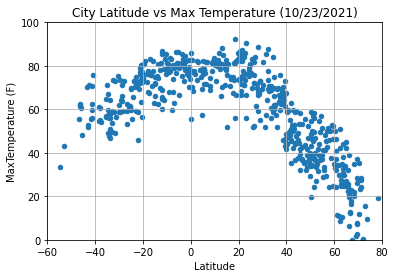

In [16]:
clean_city_data.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     title='City Latitude vs Max Temperature (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Humidity Plot

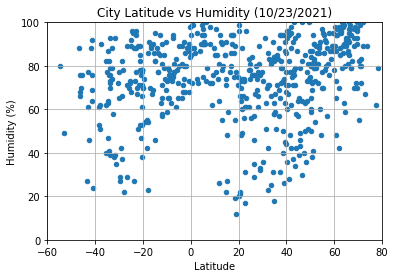

In [17]:
clean_city_data.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     title='City Latitude vs Humidity (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Cloudiness Plot

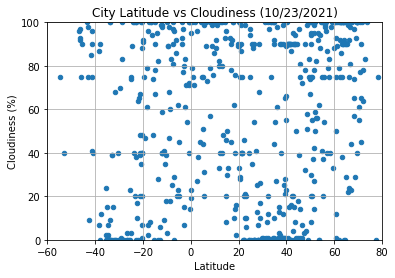

In [18]:
clean_city_data.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     title='City Latitude vs Cloudiness (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Wind Speed Plot

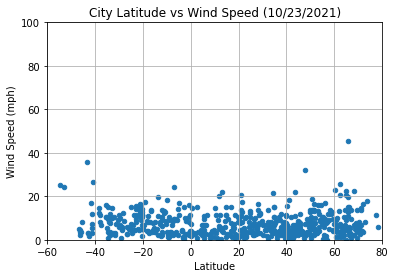

In [19]:
clean_city_data.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     title='City Latitude vs Wind Speed (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Linear Regression

In [20]:
n_hemisphere = clean_city_data.loc[clean_city_data['Lat']>=0]
s_hemisphere = clean_city_data.loc[clean_city_data['Lat']<0]

n_lat = n_hemisphere['Lat']
s_lat = s_hemisphere['Lat']

In [21]:
# Northern Hemisphere Linear Regressions
Ntemp_slope, Ntemp_intercept, Ntemp_r_value, Ntemp_p_value, Ntemp_std = linregress(n_hemisphere['Lat'],n_hemisphere['Max Temp'])

Nhm_slope, Nhm_intercept, Nhm_r_value, Nhm_p_value, Nhm_std = linregress(n_hemisphere['Lat'],n_hemisphere['Humidity'])

Ncl_slope, Ncl_intercept, Ncl_r_value, Ncl_p_value, Ncl_std = linregress(n_hemisphere['Lat'],n_hemisphere['Cloudiness'])

Nws_slope, Nws_intercept, Nws_r_value, Nws_p_value, Nws_std = linregress(n_hemisphere['Lat'],n_hemisphere['Wind Speed'])

# Southern Hemisphere Linear Regressions
Stemp_slope, Stemp_intercept, Stemp_r_value, Stemp_p_value, Stemp_std = linregress(s_hemisphere['Lat'],s_hemisphere['Max Temp'])

Shm_slope, Shm_intercept, Shm_r_value, Shm_p_value, Shm_std = linregress(s_hemisphere['Lat'],s_hemisphere['Humidity'])

Scl_slope, Scl_intercept, Scl_r_value, Scl_p_value, Scl_std = linregress(s_hemisphere['Lat'],s_hemisphere['Cloudiness'])

Sws_slope, Sws_intercept, Sws_r_value, Sws_p_value, Sws_std = linregress(s_hemisphere['Lat'],s_hemisphere['Wind Speed'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8688825538424758


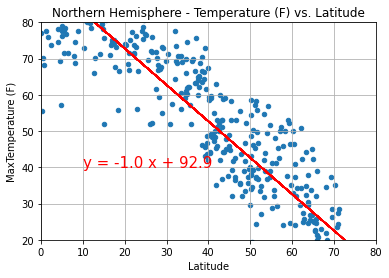

In [22]:
print(f'The r-value is {Ntemp_r_value}')
n_hemisphere.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     grid=True,xlim=(0,80),ylim=(20,80),title='Northern Hemisphere - Temperature (F) vs. Latitude')
n_temp_fit = Ntemp_slope*n_lat+Ntemp_intercept
eq_n_temp = (f'y = {round(Ntemp_slope,2)} x + {round(Ntemp_intercept,2)}')
plt.annotate(eq_n_temp,(10,40),fontsize=15,color='r')
plt.plot(n_lat,n_temp_fit,color='r')
plt.savefig('Images/NH Temp vs Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7256910768298587


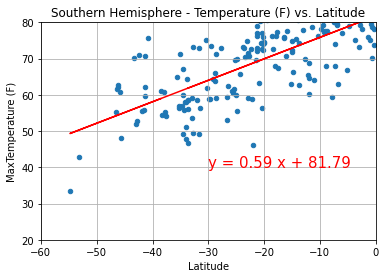

In [23]:
print(f'The r-value is {Stemp_r_value}')
s_hemisphere.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     grid=True,xlim=(-60,0),ylim=(20,80), title='Southern Hemisphere - Temperature (F) vs. Latitude')
s_temp_fit = Stemp_slope*s_lat+Stemp_intercept
eq_s_temp = (f'y = {round(Stemp_slope,2)} x + {round(Stemp_intercept,2)}')
plt.annotate(eq_s_temp,(-30,40),fontsize=15,color='r')
plt.plot(s_lat,s_temp_fit,color='r')
plt.savefig('Images/SH Temp vs Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.17608238601418266


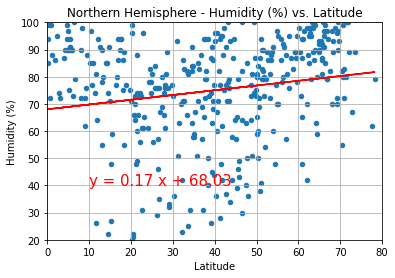

In [24]:
print(f'The r-value is {Nhm_r_value}')
n_hemisphere.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     grid=True,xlim=(0,80),ylim=(20,100), title='Northern Hemisphere - Humidity (%) vs. Latitude')
n_hm_fit = Nhm_slope*n_lat+Nhm_intercept
eq_n_hm = (f'y = {round(Nhm_slope,2)} x + {round(Nhm_intercept,2)}')
plt.annotate(eq_n_hm,(10,40),fontsize=15,color='r')
plt.plot(n_lat,n_hm_fit,color='r')
plt.savefig('Images/NH Humidity vs Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2860794786123382


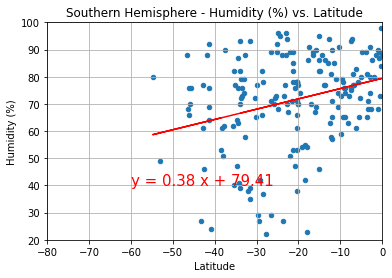

In [25]:
print(f'The r-value is {Shm_r_value}')
s_hemisphere.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     grid=True,xlim=(-80,0),ylim=(20,100), title='Southern Hemisphere - Humidity (%) vs. Latitude')
s_hm_fit = Shm_slope*s_lat+Shm_intercept
eq_s_hm = (f'y = {round(Shm_slope,2)} x + {round(Shm_intercept,2)}')
plt.annotate(eq_s_hm,(-60,40),fontsize=15,color='r')
plt.plot(s_lat,s_hm_fit,color='r')
plt.savefig('Images/SH Humidity vs Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.12772642761780637


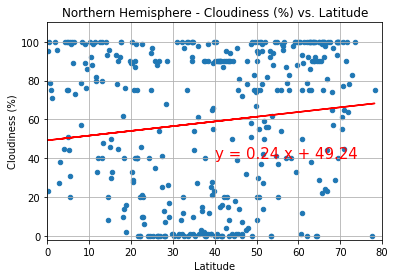

In [26]:
print(f'The r-value is {Ncl_r_value}')
n_hemisphere.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     grid=True,xlim=(0,80),ylim=(-2,110), title='Northern Hemisphere - Cloudiness (%) vs. Latitude')
n_cl_fit = Ncl_slope*n_lat+Ncl_intercept
eq_n_cl = (f'y = {round(Ncl_slope,2)} x + {round(Ncl_intercept,2)}')
plt.annotate(eq_n_cl,(40,40),fontsize=15,color='r')
plt.plot(n_lat,n_cl_fit,color='r')
plt.savefig('Images/NH Cloudiness vs Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.16171757950460242


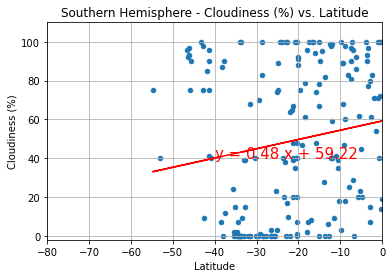

In [27]:
print(f'The r-value is {Scl_r_value}')
s_hemisphere.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     grid=True,xlim=(-80,0),ylim=(-2,110), title='Southern Hemisphere - Cloudiness (%) vs. Latitude')
s_cl_fit = Scl_slope*s_lat+Scl_intercept
eq_s_cl = (f'y = {round(Scl_slope,2)} x + {round(Scl_intercept,2)}')
plt.annotate(eq_s_cl,(-40,40),fontsize=15,color='r')
plt.plot(s_lat,s_cl_fit,color='r')
plt.savefig('Images/SH Cloudiness vs Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1461055013960587


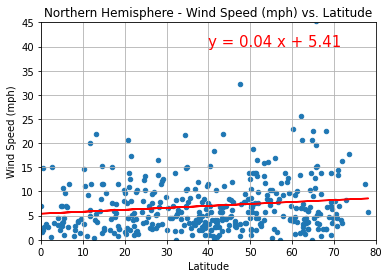

In [28]:
print(f'The r-value is {Nws_r_value}')
n_hemisphere.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     grid=True,xlim=(0,80),ylim=(0,45), title='Northern Hemisphere - Wind Speed (mph) vs. Latitude')
n_ws_fit = Nws_slope*n_lat+Nws_intercept
eq_n_ws = (f'y = {round(Nws_slope,2)} x + {round(Nws_intercept,2)}')
plt.annotate(eq_n_ws,(40,40),fontsize=15,color='r')
plt.plot(n_lat,n_ws_fit,color='r')
plt.savefig('Images/NH Wind Speed vs Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.16409751786106788


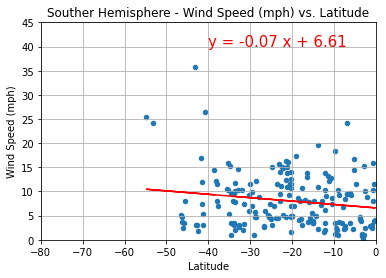

In [29]:
print(f'The r-value is {Sws_r_value}')
s_hemisphere.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     grid=True,xlim=(-80,0),ylim=(0,45), title='Souther Hemisphere - Wind Speed (mph) vs. Latitude')
s_ws_fit = Sws_slope*s_lat+Sws_intercept
eq_s_ws = (f'y = {round(Sws_slope,2)} x + {round(Sws_intercept,2)}')
plt.annotate(eq_s_ws,(-40,40),fontsize=15,color='r')
plt.plot(s_lat,s_ws_fit,color='r')
plt.savefig('Images/SH Wind Speed vs Lat.png')
plt.show()